In [5]:
import matplotlib.pyplot as plt
def plot_list(list1,list2,label_1,label_2):
    plt.plot(list1,label=label_1,color="blue")
    plt.plot(list2,label=label_2,color="red")
    plt.show()

In [6]:
import sys 
sys.path.append("..") 
from policy_sampler.sampler import Sampler
from DMCG_Discriminator.dmcg_discriminator import DMCG_Discriminator
import argparse
import torch
from bfgs_env.bfgs_relax import batch_compute, batch_relax
import time
import numpy as np
import matplotlib.pyplot as plt

## shared args
if_relax=False
lr=1e-4
decay_steps=350
decay_rate=0.9
pos_scale=2
num_steps=1000
num_atoms=10
batch_size=64
threshold=1
max_relax_steps=200
cuda=True
## DMCG args
num_message_passing_steps=12
mlp_hidden_size=512
mlp_layers=2
latent_size=256
use_layer_norm=False
global_reducer="sum"
node_reducer="sum"
dropedge_rate=0.1
dropnode_rate=0.1
dropout=0.1
layernorm_before=False
use_bn=False
cycle=1
node_attn=True
global_attn=True

device=torch.device("cuda" if cuda else "cpu")

intrinsic_params={
    "device":device,
    "lr":lr,
    "num_atoms":num_atoms,
    "mlp_hidden_size":mlp_hidden_size,
    "mlp_layers":mlp_layers,
    "latent_size":latent_size,
    "use_layer_norm":use_layer_norm,
    "num_message_passing_steps":num_message_passing_steps,
    "global_reducer":global_reducer,
    "node_reducer":node_reducer,
    "dropedge_rate":dropedge_rate,
    "dropnode_rate":dropnode_rate,
    "dropout":dropout,
    "layernorm_before":layernorm_before,
    "use_bn":use_bn,
    "cycle":cycle,
    "node_attn":node_attn,
    "global_attn":global_attn
}

extrinsic_params={
    "device":device,
    "lr":lr,
    "num_atoms":num_atoms,
    "mlp_hidden_size":mlp_hidden_size,
    "mlp_layers":mlp_layers,
    "latent_size":latent_size,
    "use_layer_norm":use_layer_norm,
    "num_message_passing_steps":num_message_passing_steps,
    "global_reducer":global_reducer,
    "node_reducer":node_reducer,
    "dropedge_rate":dropedge_rate,
    "dropnode_rate":dropnode_rate,
    "dropout":dropout,
    "layernorm_before":layernorm_before,
    "use_bn":use_bn,
    "cycle":cycle,
    "node_attn":node_attn,
    "global_attn":global_attn
}

sampler=Sampler(num_atoms,pos_scale, threshold)
discriminator=DMCG_Discriminator(intrinsic_params,
                                extrinsic_params,
                                num_atoms,
                                decay_steps,
                                decay_rate,
                                device)

discriminator.load_model("./dmcg_model_save/multistep_")

conforms,sampled_batch_size=sampler.batch_sample(batch_size)
if if_relax:
    _,energy=batch_relax(conforms,max_relax_steps,sampled_batch_size)
else:
    energy=batch_compute(conforms,sampled_batch_size)
energy=torch.FloatTensor(energy).unsqueeze(-1)
intrinsic_loss,extrinsic_loss,intrinsic_rewards,extrinsic_rewards = discriminator.compute_loss_and_train(conforms, energy)

energy=energy.squeeze(-1).tolist()


In [7]:
print(energy)
print(intrinsic_rewards)
print(extrinsic_rewards)

[-6.362199306488037, -2.8653643131256104, -2.767047882080078, -7.846169948577881, -2.121838092803955, -6.310589790344238, -4.5025835037231445, -7.462783336639404, -5.8542938232421875, -5.348147869110107, -4.354369163513184, -3.7205634117126465, -7.009658336639404, -7.845358848571777, -7.118561744689941, -4.435483932495117, -2.616079807281494, -5.020463466644287, -6.563826084136963, -3.909727096557617, -1.6562856435775757, -4.935145854949951, -2.0256354808807373, -5.888741493225098, -4.902183532714844, -3.6909308433532715, -2.9582293033599854, -4.472952842712402, -5.18709659576416, -2.569762945175171, -2.0973472595214844, -4.997213363647461, -4.862085819244385, -2.366368293762207, -2.4730308055877686, -4.486598491668701, -8.460862159729004, -5.320610046386719, -5.745204925537109, -3.9871826171875, -4.330769062042236, -2.5994558334350586, -3.744628667831421, -7.198973178863525, -3.1091361045837402, -3.5057456493377686, -3.7568416595458984, -4.62066125869751, -3.4040706157684326, -3.04291

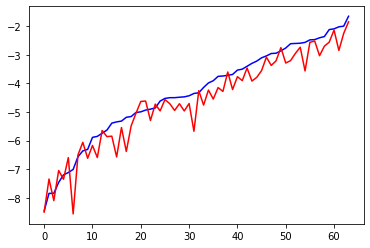

In [8]:
energy_cat=np.vstack((extrinsic_rewards,energy))
energy_cat=energy_cat[:,np.argsort(energy_cat[1,:])]
plot_list(energy_cat[1,:],energy_cat[0,:],"real_energy","extrinsic_rewards")

[0.30065155029296875, 0.11373066902160645, -0.5236740112304688, 0.5007228851318359, -0.44055795669555664, -0.30899524688720703, -0.21018457412719727, 0.41649627685546875, -0.7386164665222168, -1.2247295379638672, -1.3211851119995117, 0.1160576343536377, -1.5544219017028809, -0.2537994384765625, 0.5217552185058594, -0.2703390121459961, -0.5922017097473145, -0.027484893798828125, 0.06380319595336914, -0.6409449577331543, -0.19597113132476807, 0.31548309326171875, -0.8262219429016113, -0.28206872940063477, -0.39711570739746094, -0.5262918472290039, -0.4167206287384033, -0.4937882423400879, -1.1957612037658691, -0.997877836227417, -0.04176735877990723, 0.36344289779663086, 0.13446950912475586, -0.3352680206298828, -0.05033993721008301, -0.2272481918334961, -0.03901863098144531, -0.2245936393737793, 0.09540367126464844, -0.24975824356079102, 0.07416868209838867, -0.14017009735107422, -0.538644552230835, -0.15351104736328125, -0.4467339515686035, -0.39945530891418457, -0.39231157302856445, -

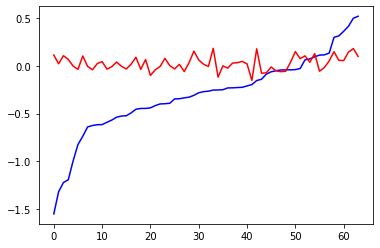

In [11]:
res=np.subtract(extrinsic_rewards,energy).tolist()
print(res)
res_cat=np.vstack((intrinsic_rewards,res))
res_cat=res_cat[:,np.argsort(res_cat[1,:])]
plot_list(res_cat[1,:],res_cat[0,:],"real_res","intrinsic_rewards")